Solution for Task1 Gate Tomography

For more details refer the document named "Task1_Gate_Tomography_MK.docx" by Madhuri Konnur

In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.circuit.library import U3Gate
import numpy as np
from scipy.optimize import minimize



In [4]:


# Build custom circuit with U3 gates
def build_custom_circuit(params):
    qc = QuantumCircuit(3)
    qc.t(0)
    qc.append(U3Gate(params[0], params[1], params[2]), [2])
    qc.append(U3Gate(params[3], params[4], params[5]), [2])
    qc.h(2)
    # Add controlled operations based on your diagram
    qc.cx(2, 1)
    qc.t(1)
    qc.cx(2, 1)
    qc.t(1)
    qc.cx(2, 1)
    return qc

# Reference Toffoli gate
qc_toffoli = QuantumCircuit(3)
qc_toffoli.ccx(1, 2, 0)
unitary_toffoli = Operator(qc_toffoli).data

# Cost function to minimize
def cost(params):
    qc = build_custom_circuit(params)
    unitary_custom = Operator(qc).data
    return np.linalg.norm(unitary_custom - unitary_toffoli)

# Initial guess for U3 parameters
initial_guess = np.random.rand(6) * 2 * np.pi
result = minimize(cost, initial_guess, method='COBYLA')

# Output results
print("Optimized U3 parameters:")
print("U3 #1: θ1 = {:.4f}, φ1 = {:.4f}, λ1 = {:.4f}".format(*result.x[:3]))
print("U3 #2: θ2 = {:.4f}, φ2 = {:.4f}, λ2 = {:.4f}".format(*result.x[3:]))

Optimized U3 parameters:
U3 #1: θ1 = 3.0841, φ1 = 1.4503, λ1 = 2.3471
U3 #2: θ2 = -1.5501, φ2 = 6.3369, λ2 = 3.6276


# Visualize U3 gates, we can use Qiskit’s built-in circuit drawer to show the gates clearly


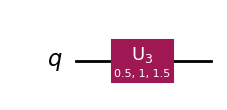

In [6]:
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit.circuit.library import U3Gate

# Define parameters
theta, phi, lam = 0.5, 1.0, 1.5

# Create circuit with U3 gate
qc = QuantumCircuit(1)
qc.append(U3Gate(theta, phi, lam), [0])
qc.draw('mpl')  # Use 'mpl' for Matplotlib visualization

 # Entire Circuit (Toffoli Equivalent Circuit")

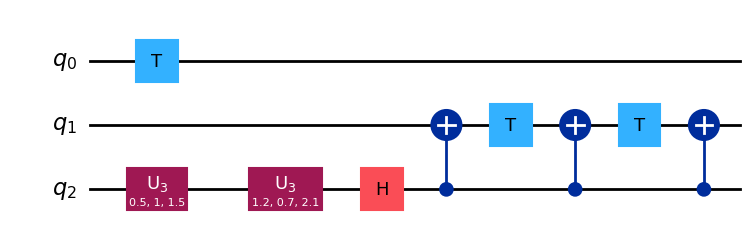

In [7]:
%matplotlib inline

from qiskit import QuantumCircuit
from qiskit.circuit.library import U3Gate

# Define parameters
theta1, phi1, lam1 = 0.5, 1.0, 1.5
theta2, phi2, lam2 = 1.2, 0.7, 2.1

# Create circuit
qc = QuantumCircuit(3)
qc.name = "Toffoli Equivalent Circuit"

qc.t(0)
qc.append(U3Gate(theta1, phi1, lam1), [2])
qc.append(U3Gate(theta2, phi2, lam2), [2])
qc.h(2)
qc.cx(2, 1)
qc.t(1)
qc.cx(2, 1)
qc.t(1)
qc.cx(2, 1)

# Draw the full circuit
qc.draw('mpl')

# Want to Know What Gates(U3) Approximate?

In [8]:
from qiskit.quantum_info import Operator
from qiskit.circuit.library import U3Gate

u3_1 = Operator(U3Gate(0.5, 1, 1.5)).data
u3_2 = Operator(U3Gate(1.2, 0.7, 2.1)).data
print("U3 #1 matrix:\n", u3_1)
print("U3 #2 matrix:\n", u3_2)

U3 #1 matrix:
 [[ 0.96891242+0.j         -0.01750066-0.24678421j]
 [ 0.13367293+0.20818325j -0.776238  +0.57986709j]]
U3 #2 matrix:
 [[ 0.82533561+0.j          0.28505755-0.48740467j]
 [ 0.43186238+0.36375267j -0.77764965+0.27647765j]]


# Visualize Bloch Sphere Action


U3 #2 Bloch vector: [ 0.713 -0.6    0.362]


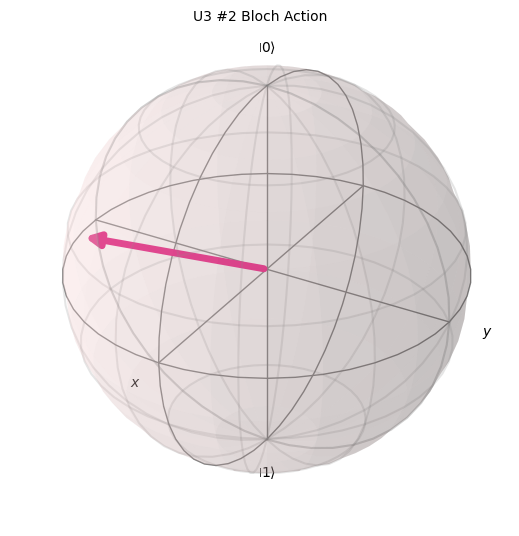

In [10]:
%matplotlib inline

from qiskit import QuantumCircuit
from qiskit.circuit.library import U3Gate
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import numpy as np

def bloch_from_state(state):
    x = 2 * np.real(state[0] * np.conj(state[1]))
    y = 2 * np.imag(state[0] * np.conj(state[1]))
    z = np.abs(state[0])**2 - np.abs(state[1])**2
    return [x, y, z]

# U3 #1 parameters
theta1, phi1, lam1 = 0.5, 1.0, 1.5
qc1 = QuantumCircuit(1)
qc1.append(U3Gate(theta1, phi1, lam1), [0])
state1 = Statevector.from_instruction(qc1).data
bloch1 = bloch_from_state(state1)

# U3 #2 parameters
theta2, phi2, lam2 = 1.2, 0.7, 2.1
qc2 = QuantumCircuit(1)
qc2.append(U3Gate(theta2, phi2, lam2), [0])
state2 = Statevector.from_instruction(qc2).data
bloch2 = bloch_from_state(state2)

# Plot Bloch vectors
print("U3 #2 Bloch vector:", np.round(bloch2, 3))
plot_bloch_vector(bloch2, title="U3 #2 Bloch Action")